# Apply Sentiment Analysis in Stock Price Prediction - Demo

**Created by: Claire Z. Sun**

**Last Modified: 2021.02.14**

In [1]:
import numpy as np
import pandas as pd
import ast
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

# set dataframe display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 1000)

#from IPython.display import Markdown, Image

In [2]:
from modules.Twitter_download_SUN import Download_Tweets
from modules.Yfinance_download_SUN import Download_SharePrice
from modules.pipeline_analysis_SUN import run_sentiment_analysis, run_price_prediction

There are 1 GPU(s) available.
Device name: GeForce GTX 1650


C:\Users\clair\Desktop\WS2020\NLP\Project\modules\preprocessing_SUN.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dict_emoticon = pd.read_csv('./modules/emoticons.csv', header='infer', delimiter='\t', index_col=0).T.to_dict()
C:\ProgramData\Anaconda3\lib\site-packages\spacy\util.py:271: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.0). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


### User Inputs

In [3]:
ticker = 'TSLA'
company = 'Tesla'
predict_date = '2021-02-12'

### Download Share Prices

In [4]:
price_start ='2021-02-07' # predict_date-5
price_end = '2021-02-13'  # predict_date+1 for demo (comparing prediction vs actual)
time_0 = time.time()
price_save = f'data/demo_shapeprice_{company}_{predict_date}.csv'
Download_SharePrice(price_save, ticker, price_start, price_end)
print(f"Shareprice downloading completed in {time.time() - time_0:.3f}s")

[*********************100%***********************]  1 of 1 completed
Shareprice downloading completed in 0.632s


### Download Tweets

In [5]:
twitter_start ='2021-02-10' #predict_date-2
twitter_end = '2021-02-12'  #predict_date - Tweets collected before this date
time_0 = time.time()
twitter_save = f'data/demo_rawtweets_{company}_{predict_date}.csv'
twitter_search_term = f"${ticker} OR {company} -filter:retweets"
Download_Tweets(twitter_save, twitter_search_term, twitter_start, twitter_end)
print(f"Tweets downloading completed in {time.time() - time_0:.3f}s")

Tweets downloading completed in 1049.571s


### Preprocessing and Sentiment Analysis

### TSLA ###

Loading raw tweets from 1 files:
>> loading: 0.142 s

Start processing 58229 raw tweets:
>> text preprocessing: 74.397 s

Start sentiment analysis on 58229 tweets:
>> vader: 6.395 s
>> nb_count: 0.958 s
>> lr_tfidf: 0.969 s
>> svm_w2v: 15.650 s
>> bert: 962.759 s
>> majority: 16.227 s

Sentiment analysis completed! Total processing time: 18.0 min



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


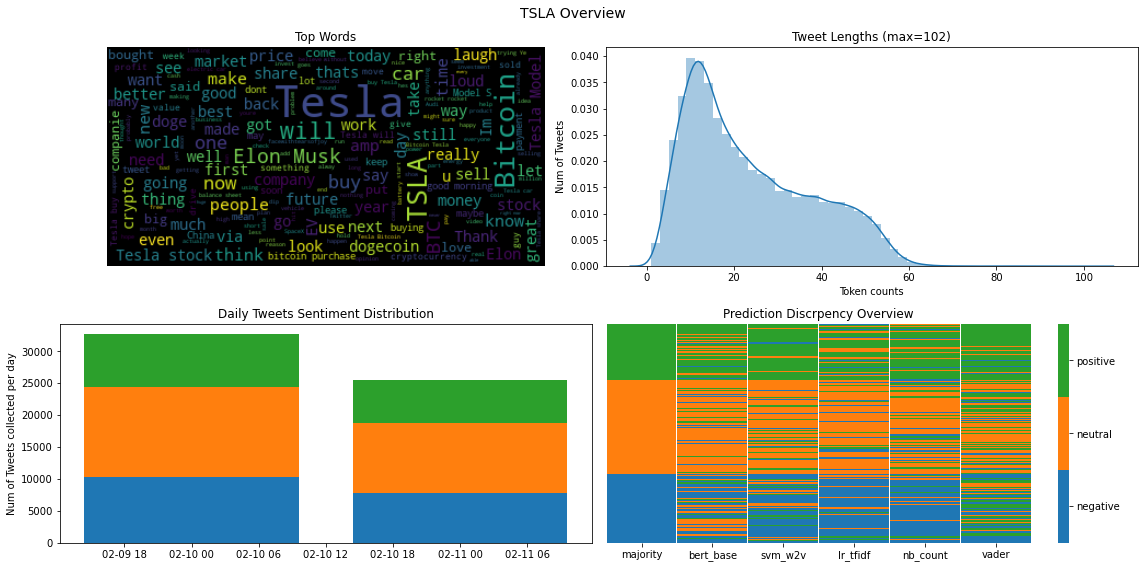

In [6]:
sentiments_save = f'output/{company}_sentiments_{predict_date}.csv'
predictions_save = f'output/{company}_predictions_{predict_date}.csv'
log_save = f'output/{company}_log_{predict_date}.txt'
vis_save = f'output/{company}_vis_{predict_date}.png'
run_sentiment_analysis(ticker, [twitter_save], sentiments_save, predictions_save, log_save, vis_save)

### Price Prediction and Visualisation

C:\Users\clair\Desktop\WS2020\NLP\Project\modules\pipeline_analysis_SUN.py:255: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.savefig(f'output/{company}_price_prediction.png')


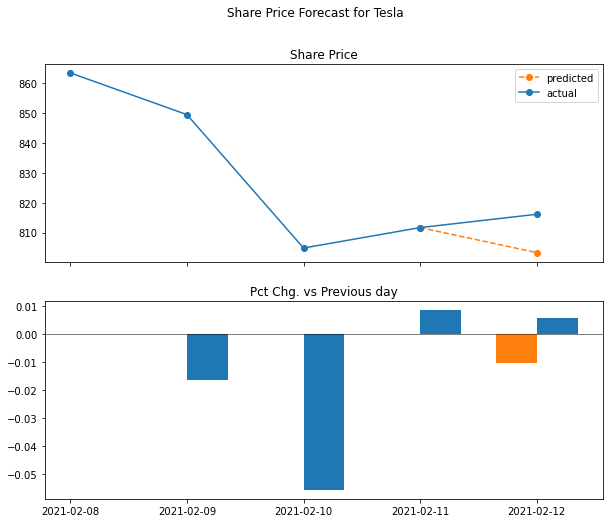

Predicted next day price movement for Tesla: -1.03%
Predicted next day closing share price: $803.29/share


In [18]:
run_price_prediction(company, price_save,sentiments_save)